In [2545]:

import numpy as np         # dealing with arrays
import os                  # dealing with directories

import pandas as pd
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import glob

### functions

In [2546]:
# time drop
def time_drop(df):
    x=df['Time'].values[0]+7
    indexNames = df[df['Time'] <= x].index
    df.drop(indexNames , inplace=True)
    return df  

In [2547]:
#merge rowes
def merge_rowes(df):
    df.set_index(" Hand Type", inplace = True)
    df_lf_sync = df.loc[["left"]].reset_index()
    df_rg_sync = df.loc[["right"]].reset_index()
    df_sync= pd.merge(df_lf_sync , df_rg_sync, left_index=True, right_index=True, how='outer')
    return df_sync

In [2548]:
# drop worng num of hands
def drop_hands(df,x):
    indexNames = df[df[' # hands'] == x].index
    df.drop(indexNames , inplace=True)
    return df

### sync data


In [2549]:

path = r'D:\downloads\קבצים לעבודת גמר\extraFiles\Training\all data\sync' 
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None,)
    time_drop(df)
    drop_hands(df,1)
    li.append(df)
    frame_sy = pd.concat(li, axis=0, ignore_index=True)    
      
    
      


In [2550]:
frame_sy.groupby(' Hand Type').count()

,Time,Frame ID,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
Hand Type,,,,,,,,,,,,,,,,,,,,,
left,34044,34044,34044,34044,34044,34044,34044,34044,34044,34044,...,34044,34044,34044,34044,34044,34044,34044,34044,34044,34044
right,34044,34044,34044,34044,34044,34044,34044,34044,34044,34044,...,34044,34044,34044,34044,34044,34044,34044,34044,34044,34044


In [2551]:
frame_sy=merge_rowes(frame_sy)

### Spontan data

In [2552]:

path = r'D:\downloads\קבצים לעבודת גמר\extraFiles\Training\all data\Spontan' 
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    time_drop(df)
    drop_hands(df,1)
    li.append(df)
    frame_sp = pd.concat(li, axis=0, ignore_index=True)    
      

In [2553]:
frame_sp.groupby(' Hand Type').count()

,Time,Frame ID,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
Hand Type,,,,,,,,,,,,,,,,,,,,,
left,34182,34182,34182,34182,34182,34182,34182,34182,34182,34182,...,34182,34182,34182,34182,34182,34182,34182,34182,34182,34182
right,34182,34182,34182,34182,34182,34182,34182,34182,34182,34182,...,34182,34182,34182,34182,34182,34182,34182,34182,34182,34182


In [2554]:
frame_sp =merge_rowes(frame_sp)

### Alone data

In [2555]:
path = r'D:\downloads\קבצים לעבודת גמר\extraFiles\Training\all data\Alone' 
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    time_drop(df)
    drop_hands(df,2)
    li.append(df)
    frame_alone = pd.concat(li, axis=0, ignore_index=True)    
      

In [2556]:
indexNames = frame_alone[frame_alone[' Hand Type'] == 'right'].index
# Delete these row indexes from dataFrame
frame_alone.drop(indexNames , inplace=True)

In [2557]:
frame_alone=frame_alone.reset_index()


In [2558]:
path = r'D:\downloads\קבצים לעבודת גמר\extraFiles\Training\all data\right' 
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    time_drop(df)
    drop_hands(df,2)
    li.append(df)
    df_right = pd.concat(li, axis=0, ignore_index=True)    
      

In [2559]:
indexNames =df_right[df_right[' Hand Type'] == 'left'].index
# Delete these row indexes from dataFrame
df_right.drop(indexNames , inplace=True)

In [2560]:
df_right=df_right.dropna()

In [2561]:
df_right

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,135.3024,16287,right,1,11.930320,199.9861,4.981665,-35.512210,-165.34660,-57.68153,...,-0.906612,75.457400,206.0521,45.38764,284.3946,140.01670,201.9318,0.0,0.561324,0.0
1,135.3194,16289,right,1,11.191900,195.3075,3.661716,-43.587440,-309.83740,-77.18515,...,-0.904311,74.461410,202.4562,44.28679,282.6278,140.97120,203.6773,0.0,0.626321,0.0
2,135.3357,16291,right,1,10.533080,189.0297,2.829388,-30.403600,-363.00330,-43.79815,...,-0.901862,73.600600,197.4387,43.54082,280.6384,142.54010,206.7526,0.0,0.636596,0.0
3,135.3524,16293,right,1,10.243000,181.9816,2.064330,-15.424000,-423.21200,-43.99948,...,-0.901268,73.195370,191.7202,42.73155,279.7357,148.13820,209.9330,0.0,0.701644,0.0
4,135.3690,16295,right,1,10.020610,174.8592,1.228467,-8.733602,-413.45130,-53.88054,...,-0.897777,72.686710,186.1613,41.98006,278.6890,152.52150,212.1112,0.0,0.786548,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3888,201.0806,23867,right,1,-8.623579,163.7605,207.301100,-271.901400,-12.95597,1133.33900,...,0.004875,5.541947,119.3280,267.78980,171.7839,-42.17188,410.2199,0.0,0.765803,0.0
3889,201.0967,23869,right,1,-13.097740,162.5545,225.698500,-266.212900,-102.12860,1029.19300,...,0.003377,1.698353,117.0805,285.09920,179.2368,-44.11964,413.5244,0.0,0.783391,0.0
3890,201.1133,23871,right,1,-16.722380,160.9650,240.584400,-192.594300,-87.53856,769.65150,...,0.004909,-1.484266,114.0260,298.58760,186.0559,-44.35751,415.7693,0.0,0.684677,0.0
3891,201.1299,23873,right,1,-19.684070,160.7849,251.099800,-158.997200,73.45740,557.20370,...,0.004470,-4.015731,112.9914,308.15980,190.9921,-42.38844,416.7549,0.0,0.591905,0.0


In [2562]:
df_right_copy=df_right

In [2563]:
li = []
for i in range (9):
    df = df_right_copy
    li.append(df)
    df_right_copymul = pd.concat(li, axis=0, ignore_index=True)
    

In [2564]:
 df_right_copymul

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,135.3024,16287,right,1,11.930320,199.9861,4.981665,-35.512210,-165.34660,-57.68153,...,-0.906612,75.457400,206.0521,45.38764,284.3946,140.01670,201.9318,0.0,0.561324,0.0
1,135.3194,16289,right,1,11.191900,195.3075,3.661716,-43.587440,-309.83740,-77.18515,...,-0.904311,74.461410,202.4562,44.28679,282.6278,140.97120,203.6773,0.0,0.626321,0.0
2,135.3357,16291,right,1,10.533080,189.0297,2.829388,-30.403600,-363.00330,-43.79815,...,-0.901862,73.600600,197.4387,43.54082,280.6384,142.54010,206.7526,0.0,0.636596,0.0
3,135.3524,16293,right,1,10.243000,181.9816,2.064330,-15.424000,-423.21200,-43.99948,...,-0.901268,73.195370,191.7202,42.73155,279.7357,148.13820,209.9330,0.0,0.701644,0.0
4,135.3690,16295,right,1,10.020610,174.8592,1.228467,-8.733602,-413.45130,-53.88054,...,-0.897777,72.686710,186.1613,41.98006,278.6890,152.52150,212.1112,0.0,0.786548,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35032,201.0806,23867,right,1,-8.623579,163.7605,207.301100,-271.901400,-12.95597,1133.33900,...,0.004875,5.541947,119.3280,267.78980,171.7839,-42.17188,410.2199,0.0,0.765803,0.0
35033,201.0967,23869,right,1,-13.097740,162.5545,225.698500,-266.212900,-102.12860,1029.19300,...,0.003377,1.698353,117.0805,285.09920,179.2368,-44.11964,413.5244,0.0,0.783391,0.0
35034,201.1133,23871,right,1,-16.722380,160.9650,240.584400,-192.594300,-87.53856,769.65150,...,0.004909,-1.484266,114.0260,298.58760,186.0559,-44.35751,415.7693,0.0,0.684677,0.0
35035,201.1299,23873,right,1,-19.684070,160.7849,251.099800,-158.997200,73.45740,557.20370,...,0.004470,-4.015731,112.9914,308.15980,190.9921,-42.38844,416.7549,0.0,0.591905,0.0


In [2565]:
df_right_copymul.drop( df_right_copymul.tail(1096).index,
        inplace = True)

In [2566]:
df_right_copymul=df_right_copymul.reset_index()

In [2567]:
df_right_copymul.Time = frame_alone.Time


In [2568]:
df_right_copymul[" Frame ID"]=frame_alone[" Frame ID"]

In [2569]:
df_right_copymul

,index,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,0,525.8185,150428,right,1,11.93032,199.9861,4.981665,-35.512210,-165.3466,...,-0.906612,75.45740,206.0521,45.38764,284.3946,140.016700,201.9318,0.000000,0.561324,0.000000
1,1,525.8351,150430,right,1,11.19190,195.3075,3.661716,-43.587440,-309.8374,...,-0.904311,74.46141,202.4562,44.28679,282.6278,140.971200,203.6773,0.000000,0.626321,0.000000
2,2,525.8516,150432,right,1,10.53308,189.0297,2.829388,-30.403600,-363.0033,...,-0.901862,73.60060,197.4387,43.54082,280.6384,142.540100,206.7526,0.000000,0.636596,0.000000
3,3,525.8682,150434,right,1,10.24300,181.9816,2.064330,-15.424000,-423.2120,...,-0.901268,73.19537,191.7202,42.73155,279.7357,148.138200,209.9330,0.000000,0.701644,0.000000
4,4,525.8848,150436,right,1,10.02061,174.8592,1.228467,-8.733602,-413.4513,...,-0.897777,72.68671,186.1613,41.98006,278.6890,152.521500,212.1112,0.000000,0.786548,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33936,33936,764.4578,59984,right,1,12.21766,178.0383,-52.827330,72.118750,100.2048,...,-0.187480,34.46508,142.2028,11.41217,143.4343,20.008750,228.6101,0.000000,0.517045,0.000000
33937,33937,764.4913,59986,right,1,13.27968,180.4047,-51.762120,55.057170,158.7906,...,-0.171379,34.54566,142.2069,11.44530,142.2051,13.251450,225.3625,0.118533,0.996261,0.000000
33938,33938,764.5253,59988,right,1,14.50927,186.5876,-49.489490,79.068230,395.6981,...,-0.154703,34.56064,144.5531,11.65007,136.1476,2.774369,220.3593,0.612488,1.739914,0.048438
33939,33939,764.5587,59989,right,1,15.23813,190.3499,-48.043850,84.086890,434.0411,...,-0.148095,34.78383,146.0429,11.64473,134.2390,0.052951,218.4689,0.878373,2.123332,0.280677


In [2570]:
df_right_copymul.set_index(" Hand Type", inplace = True)
frame_alone.set_index(" Hand Type", inplace = True) 
df_lf_sync = frame_alone.loc[["left"]].reset_index()
df_rg_sync = df_right_copymul.loc[["right"]].reset_index()
df_sync= pd.merge(df_lf_sync , df_rg_sync, left_index=True, right_index=True, how='outer')

In [2571]:
df_sync.columns


Index([' Hand Type_x', 'index_x', 'Time_x', ' Frame ID_x', ' # hands_x',
       ' Position X_x', ' Position Y_x', ' Position Z_x', ' Velocity X_x',
       ' Velocity Y_x', ' Velocity Z_x', ' Pitch_x', ' Roll_x', ' Yaw_x',
       ' Wrist Pos X_x', ' Wrist Pos Y_x', ' Wrist Pos Z_x', ' Elbow pos X_x',
       ' Elbow Pos Y_x', ' Elbow Pos Z_x', ' Grab Strenth_x', ' Grab Angle_x',
       ' Pinch Strength_x', ' Hand Type_y', 'index_y', 'Time_y', ' Frame ID_y',
       ' # hands_y', ' Position X_y', ' Position Y_y', ' Position Z_y',
       ' Velocity X_y', ' Velocity Y_y', ' Velocity Z_y', ' Pitch_y',
       ' Roll_y', ' Yaw_y', ' Wrist Pos X_y', ' Wrist Pos Y_y',
       ' Wrist Pos Z_y', ' Elbow pos X_y', ' Elbow Pos Y_y', ' Elbow Pos Z_y',
       ' Grab Strenth_y', ' Grab Angle_y', ' Pinch Strength_y'],
      dtype='object')

In [2572]:
df_sync=df_sync.drop(['index_x','index_y'], axis = 1)

In [2573]:
df_sync

,Hand Type_x,Time_x,Frame ID_x,# hands_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,left,525.8185,150428,1,-52.96039,184.5535,-2.856696,162.152700,127.605200,-85.837820,...,-0.906612,75.45740,206.0521,45.38764,284.3946,140.016700,201.9318,0.000000,0.561324,0.000000
1,left,525.8351,150430,1,-50.04434,185.5024,-4.845364,102.824800,-24.843370,-79.465040,...,-0.904311,74.46141,202.4562,44.28679,282.6278,140.971200,203.6773,0.000000,0.626321,0.000000
2,left,525.8516,150432,1,-49.07749,182.2930,-6.442950,12.123600,-258.752600,-99.409020,...,-0.901862,73.60060,197.4387,43.54082,280.6384,142.540100,206.7526,0.000000,0.636596,0.000000
3,left,525.8682,150434,1,-50.89614,176.7708,-9.005262,-53.572920,-271.015000,-143.033300,...,-0.901268,73.19537,191.7202,42.73155,279.7357,148.138200,209.9330,0.000000,0.701644,0.000000
4,left,525.8848,150436,1,-51.76074,174.1853,-10.600340,-40.958830,-140.443900,-59.856200,...,-0.897777,72.68671,186.1613,41.98006,278.6890,152.521500,212.1112,0.000000,0.786548,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33936,left,764.4578,59984,1,-125.81370,214.8894,20.593240,20.170870,19.997410,37.082170,...,-0.187480,34.46508,142.2028,11.41217,143.4343,20.008750,228.6101,0.000000,0.517045,0.000000
33937,left,764.4913,59986,1,-125.92320,215.6769,22.092640,-6.867068,21.957800,42.485630,...,-0.171379,34.54566,142.2069,11.44530,142.2051,13.251450,225.3625,0.118533,0.996261,0.000000
33938,left,764.5253,59988,1,-125.62170,215.7428,23.397500,17.454730,-3.217659,31.446690,...,-0.154703,34.56064,144.5531,11.65007,136.1476,2.774369,220.3593,0.612488,1.739914,0.048438
33939,left,764.5587,59989,1,-125.13520,215.6353,23.802480,25.567410,-5.648659,21.284490,...,-0.148095,34.78383,146.0429,11.64473,134.2390,0.052951,218.4689,0.878373,2.123332,0.280677


In [2574]:
frame_sy["Type"] = 0

In [2575]:
frame_sp["Type"]=1
df_sync["Type"]=2

In [2576]:
pdList = [frame_sy,frame_sp,df_sync]  # List of dataframes
df_all = pd.concat(pdList)

In [2577]:
df_all =df_all.sort_values('Time_x')

In [2578]:
df_all 

,Hand Type_x,Time_x,Frame ID_x,# hands_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,...,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y,Type
28445,left,182.5492,21577,2,-161.93030,215.8074,99.368170,12.80461,-43.17722,-168.68700,...,209.5091,172.5597,-2.273207,342.2353,15.95552,134.07660,0.0,1.476075,1.0,1
28446,left,182.5659,21579,2,-161.32040,214.3152,96.388420,20.12839,-83.41072,-164.68020,...,210.0906,172.0918,-1.983218,342.6916,16.18578,135.29430,0.0,1.474956,1.0,1
28447,left,182.5823,21581,2,-161.17540,214.2668,93.776190,26.72322,-21.68755,-161.18140,...,210.3185,171.5113,-1.979968,343.1189,16.28249,135.87790,0.0,1.474284,1.0,1
28448,left,182.5990,21582,2,-160.70280,213.7240,92.251300,54.83594,-62.98368,-176.94200,...,210.5154,171.2924,-2.009449,343.6653,16.53986,136.04660,0.0,1.469920,1.0,1
28449,left,182.6154,21584,2,-161.22440,213.5300,90.049910,-21.88871,-43.74665,-129.30340,...,211.0113,170.9632,-2.211502,346.8622,19.01384,136.32600,0.0,1.451241,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34039,left,856.1965,67304,2,-77.62601,173.7391,-14.213500,-46.75000,99.50911,71.01207,...,129.1261,148.7041,62.824040,300.6781,-33.58672,128.75430,0.0,0.000000,0.0,0
34040,left,856.2291,67306,2,-78.43058,176.0170,-12.152660,-33.69026,98.24361,59.77054,...,129.2868,148.1146,63.112180,285.6505,-53.66640,106.02620,0.0,0.000000,0.0,0
34041,left,856.2631,67309,2,-79.84506,180.2403,-9.015577,-68.45120,136.37580,87.63277,...,131.8590,149.6264,66.098530,283.6185,-58.03491,95.29868,0.0,0.000000,0.0,0
34042,left,856.2958,67311,2,-81.57359,183.5054,-7.185198,-63.24731,121.75270,62.95970,...,134.0416,151.5924,68.176930,288.9688,-54.13820,94.23959,0.0,0.000000,0.0,0


In [2579]:
df_all=df_all.drop([' Hand Type_x',' Hand Type_y',' Frame ID_x',' Frame ID_y','Time_x','Time_y',' # hands_y',' # hands_x'], axis = 1)

In [2580]:
df_all = df_all[df_all.index % 5 == 0] 

In [2581]:
df_all=df_all.reset_index()

In [2582]:
df_all.drop(['index'], axis = 1)

,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,Pitch_x,Roll_x,Yaw_x,Wrist Pos X_x,...,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y,Type
0,-161.93030,215.8074,99.36817,12.804610,-43.177220,-168.68700,1.445794,0.597092,1.481299,-219.6073,...,209.5091,172.5597,-2.273207,342.2353,15.95552,134.07660,0.0,1.476075,1.0,1
1,-161.22340,212.4058,87.50900,3.532985,-47.196920,-150.18110,1.375910,0.623088,1.417640,-218.3664,...,211.3094,171.0343,-2.788800,350.4548,22.07781,135.72930,0.0,1.434157,1.0,1
2,-161.82330,213.6154,78.65861,-32.376840,22.527170,-73.77131,1.348653,0.683064,1.372902,-216.7381,...,213.7225,173.8027,-11.694250,345.0773,30.38161,139.56850,0.0,1.099183,1.0,1
3,-160.93500,210.1329,71.86235,22.610750,-70.876630,-71.02288,1.260213,0.620132,1.326412,-218.0253,...,233.5582,179.9765,-17.977400,373.8328,27.76934,115.66440,0.0,0.272180,0.0,1
4,-160.58250,207.0979,63.93559,-51.164830,9.394481,-69.87844,1.138120,0.667229,1.203369,-215.6021,...,240.3272,181.6037,-32.688930,412.2614,54.60752,89.78521,0.0,0.411059,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20430,-65.31718,144.7325,-24.19134,24.158350,-53.874210,-68.65070,0.139560,2.219423,0.538324,-105.9261,...,131.3005,150.0649,57.949320,343.6214,46.46321,163.74800,0.0,0.000000,0.0,0
20431,-67.31480,141.4773,-28.84114,-14.888220,7.543926,-16.64003,0.052639,2.266229,0.527760,-107.4231,...,131.0979,150.8263,57.907880,341.6186,52.03195,171.60720,0.0,0.000000,0.0,0
20432,-70.24233,145.3648,-30.69582,-52.514450,82.300920,14.28084,0.079989,2.259698,0.515873,-109.8607,...,131.7389,151.7366,59.905610,345.5939,50.43782,164.84090,0.0,0.000000,0.0,0
20433,-76.47509,163.2591,-20.86482,-16.747270,110.124500,37.32913,0.389075,2.046372,0.458347,-111.7779,...,130.7932,152.3160,61.863240,330.2462,25.77906,167.75800,0.0,0.000000,0.0,0


### Test Data

### sync test data

In [2583]:

path = r'D:\downloads\קבצים לעבודת גמר\extraFiles\Validation\test data\sync' 
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None,)
    time_drop(df)
    drop_hands(df,1)
    li.append(df)
    test_sy = pd.concat(li, axis=0, ignore_index=True)    
      
    

In [2584]:
test_sy.groupby(' Hand Type').count()

,Time,Frame ID,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
Hand Type,,,,,,,,,,,,,,,,,,,,,
left,9959,9959,9959,9959,9959,9959,9959,9959,9959,9959,...,9959,9959,9959,9959,9959,9959,9959,9959,9959,9959
right,9959,9959,9959,9959,9959,9959,9959,9959,9959,9959,...,9959,9959,9959,9959,9959,9959,9959,9959,9959,9959


In [2585]:
test_sy=merge_rowes(test_sy)

### spon test data

In [2586]:

path = r'D:\downloads\קבצים לעבודת גמר\extraFiles\Validation\test data\spon' 
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None,)
    time_drop(df)
    drop_hands(df,1)
    li.append(df)
    test_spon = pd.concat(li, axis=0, ignore_index=True)    
      

In [2587]:
 test_spon=merge_rowes(test_spon)

In [2588]:
test_spon.columns

Index([' Hand Type_x', 'Time_x', ' Frame ID_x', ' # hands_x', ' Position X_x',
       ' Position Y_x', ' Position Z_x', ' Velocity X_x', ' Velocity Y_x',
       ' Velocity Z_x', ' Pitch_x', ' Roll_x', ' Yaw_x', ' Wrist Pos X_x',
       ' Wrist Pos Y_x', ' Wrist Pos Z_x', ' Elbow pos X_x', ' Elbow Pos Y_x',
       ' Elbow Pos Z_x', ' Grab Strenth_x', ' Grab Angle_x',
       ' Pinch Strength_x', ' Hand Type_y', 'Time_y', ' Frame ID_y',
       ' # hands_y', ' Position X_y', ' Position Y_y', ' Position Z_y',
       ' Velocity X_y', ' Velocity Y_y', ' Velocity Z_y', ' Pitch_y',
       ' Roll_y', ' Yaw_y', ' Wrist Pos X_y', ' Wrist Pos Y_y',
       ' Wrist Pos Z_y', ' Elbow pos X_y', ' Elbow Pos Y_y', ' Elbow Pos Z_y',
       ' Grab Strenth_y', ' Grab Angle_y', ' Pinch Strength_y'],
      dtype='object')

### alon test data

In [2589]:
path = r'D:\downloads\קבצים לעבודת גמר\extraFiles\Validation\test data\alone' 
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None,)
    time_drop(df)
    drop_hands(df,2)
    li.append(df)
    test_alone = pd.concat(li, axis=0, ignore_index=True)   

In [2590]:
test_alone.columns

Index(['Time', ' Frame ID', ' Hand Type', ' # hands', ' Position X',
       ' Position Y', ' Position Z', ' Velocity X', ' Velocity Y',
       ' Velocity Z', ' Pitch', ' Roll', ' Yaw', ' Wrist Pos X',
       ' Wrist Pos Y', ' Wrist Pos Z', ' Elbow pos X', ' Elbow Pos Y',
       ' Elbow Pos Z', ' Grab Strenth', ' Grab Angle', ' Pinch Strength'],
      dtype='object')

In [2591]:
indexNames = test_alone[test_alone[' Hand Type'] == 'right'].index
# Delete these row indexes from dataFrame
test_alone.drop(indexNames , inplace=True)

In [2592]:
test_alone

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,962.0724,112175,left,1,-139.56040,289.5980,55.82040,85.41927,-314.15190,-17.789130,...,1.327694,-200.4914,261.7830,63.46514,-379.1310,110.43980,116.0856,0.000000,0.911471,0.0
1,962.0892,112177,left,1,-137.84700,284.6244,55.60830,98.89174,-268.35150,-9.115684,...,1.326555,-199.0760,257.3272,63.25856,-383.5433,112.63620,114.6168,0.000000,0.909256,0.0
2,962.1058,112179,left,1,-135.24040,278.1614,55.07768,178.59840,-410.27810,-36.843320,...,1.329647,-196.5786,251.0247,62.48919,-381.9569,106.81380,111.8799,0.000000,0.927328,0.0
3,962.1220,112181,left,1,-131.68600,270.3371,54.44700,211.49920,-477.68290,-41.604380,...,1.334645,-194.7839,247.8369,62.06263,-384.9341,110.54120,112.9955,0.000000,0.950314,0.0
4,962.1385,112183,left,1,-128.48180,263.2296,53.83574,181.64070,-393.89460,-33.762600,...,1.341400,-191.7350,241.1172,61.10778,-381.3579,103.24660,112.4520,0.016646,1.015807,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,796.7517,50329,left,1,-62.14733,282.7198,62.15659,-90.00631,-129.34680,-50.105870,...,0.853153,-107.4325,230.6662,88.71685,-297.5073,60.94059,148.1517,0.000000,0.149477,0.0
9961,796.7842,50331,left,1,-64.38816,276.7341,60.39418,-51.70352,-204.26430,-56.992680,...,0.791928,-108.3709,224.7578,89.17332,-293.6125,50.64548,151.1262,0.000000,0.205101,0.0
9962,796.8187,50333,left,1,-65.33954,272.7191,59.17199,-27.79678,-111.88810,-42.745720,...,0.758811,-108.3173,220.3898,88.81828,-290.7480,44.09612,152.9062,0.000000,0.304604,0.0
9963,796.8510,50336,left,1,-67.02361,268.6757,57.91473,-31.61606,-76.33112,-24.734110,...,0.730031,-108.7151,215.5677,88.03761,-285.7091,36.18958,158.4956,0.000000,0.374116,0.0


In [2593]:
li = []
for i in range (3):
    df = df_right_copy
    li.append(df)
    df_right_test = pd.concat(li, axis=0, ignore_index=True)

In [2594]:
df_right_test
df_right_test.drop(df_right_test.tail(1714).index,
        inplace = True)

In [2595]:
df_right_test

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,135.3024,16287,right,1,11.930320,199.9861,4.981665,-35.512210,-165.3466,-57.68153,...,-0.906612,75.45740,206.0521,45.38764,284.3946,140.01670,201.9318,0.0,0.561324,0.0
1,135.3194,16289,right,1,11.191900,195.3075,3.661716,-43.587440,-309.8374,-77.18515,...,-0.904311,74.46141,202.4562,44.28679,282.6278,140.97120,203.6773,0.0,0.626321,0.0
2,135.3357,16291,right,1,10.533080,189.0297,2.829388,-30.403600,-363.0033,-43.79815,...,-0.901862,73.60060,197.4387,43.54082,280.6384,142.54010,206.7526,0.0,0.636596,0.0
3,135.3524,16293,right,1,10.243000,181.9816,2.064330,-15.424000,-423.2120,-43.99948,...,-0.901268,73.19537,191.7202,42.73155,279.7357,148.13820,209.9330,0.0,0.701644,0.0
4,135.3690,16295,right,1,10.020610,174.8592,1.228467,-8.733602,-413.4513,-53.88054,...,-0.897777,72.68671,186.1613,41.98006,278.6890,152.52150,212.1112,0.0,0.786548,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,172.5230,20578,right,1,-5.551620,237.0688,130.413500,9.271451,422.9503,-275.14860,...,-0.236762,19.92887,185.1379,180.89270,194.5628,14.65307,302.0390,0.0,0.104478,0.0
9961,172.5397,20580,right,1,-5.141543,243.2272,125.059200,19.242230,324.5661,-325.44850,...,-0.234826,20.08685,191.1783,175.55550,191.7803,18.45611,297.7268,0.0,0.224780,0.0
9962,172.5564,20582,right,1,-4.880616,248.3578,118.600300,20.315660,299.3939,-374.32860,...,-0.242104,20.33551,195.9444,168.77950,188.0646,22.63524,295.5403,0.0,0.366025,0.0
9963,172.5730,20584,right,1,-4.380922,252.6022,111.444000,39.319470,226.9341,-399.86910,...,-0.244019,20.66610,200.1220,161.68370,184.7965,27.69197,294.2224,0.0,0.306320,0.0


In [2596]:
df_right_test.Time = test_alone.Time

In [2597]:
df_right_test[" Frame ID"]=test_alone[" Frame ID"]

In [2598]:
df_right_test.set_index(" Hand Type", inplace = True)
test_alone.set_index(" Hand Type", inplace = True) 
df_lf_sync = test_alone.loc[["left"]].reset_index()
df_rg_sync = df_right_test.loc[["right"]].reset_index()
df_test_alone= pd.merge(df_lf_sync , df_rg_sync, left_index=True, right_index=True, how='outer')

In [2599]:
df_test_alone

,Hand Type_x,Time_x,Frame ID_x,# hands_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,left,962.0724,112175,1,-139.56040,289.5980,55.82040,85.41927,-314.15190,-17.789130,...,-0.906612,75.45740,206.0521,45.38764,284.3946,140.01670,201.9318,0.0,0.561324,0.0
1,left,962.0892,112177,1,-137.84700,284.6244,55.60830,98.89174,-268.35150,-9.115684,...,-0.904311,74.46141,202.4562,44.28679,282.6278,140.97120,203.6773,0.0,0.626321,0.0
2,left,962.1058,112179,1,-135.24040,278.1614,55.07768,178.59840,-410.27810,-36.843320,...,-0.901862,73.60060,197.4387,43.54082,280.6384,142.54010,206.7526,0.0,0.636596,0.0
3,left,962.1220,112181,1,-131.68600,270.3371,54.44700,211.49920,-477.68290,-41.604380,...,-0.901268,73.19537,191.7202,42.73155,279.7357,148.13820,209.9330,0.0,0.701644,0.0
4,left,962.1385,112183,1,-128.48180,263.2296,53.83574,181.64070,-393.89460,-33.762600,...,-0.897777,72.68671,186.1613,41.98006,278.6890,152.52150,212.1112,0.0,0.786548,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,left,796.7517,50329,1,-62.14733,282.7198,62.15659,-90.00631,-129.34680,-50.105870,...,-0.236762,19.92887,185.1379,180.89270,194.5628,14.65307,302.0390,0.0,0.104478,0.0
9961,left,796.7842,50331,1,-64.38816,276.7341,60.39418,-51.70352,-204.26430,-56.992680,...,-0.234826,20.08685,191.1783,175.55550,191.7803,18.45611,297.7268,0.0,0.224780,0.0
9962,left,796.8187,50333,1,-65.33954,272.7191,59.17199,-27.79678,-111.88810,-42.745720,...,-0.242104,20.33551,195.9444,168.77950,188.0646,22.63524,295.5403,0.0,0.366025,0.0
9963,left,796.8510,50336,1,-67.02361,268.6757,57.91473,-31.61606,-76.33112,-24.734110,...,-0.244019,20.66610,200.1220,161.68370,184.7965,27.69197,294.2224,0.0,0.306320,0.0


### test dataframe

In [2600]:
test_sy["Type"] = 0
test_spon["Type"]=1
df_test_alone["Type"]=2

In [2601]:
pdtest= [test_sy,test_spon,df_test_alone]  # List of dataframes
df_all_test = pd.concat(pdtest)

In [2602]:
df_all_test

,Hand Type_x,Time_x,Frame ID_x,# hands_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,...,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y,Type
0,left,873.0052,101916,2,-165.54570,210.9649,34.54411,-20.78199,141.12930,158.17200,...,126.75030,179.9287,47.80795,222.4352,19.06148,198.3806,0.0,0.000000,0.0,0
1,left,873.0218,101918,2,-166.27120,213.6761,37.09645,-41.68034,146.74810,152.49840,...,124.27610,183.5448,48.00742,222.1145,14.49698,187.8518,0.0,0.000000,0.0,0
2,left,873.0384,101919,2,-166.79580,215.2421,38.41218,-60.55362,180.76270,151.87930,...,123.14640,184.8697,48.46577,223.1355,13.36058,183.7166,0.0,0.000000,0.0,0
3,left,873.0549,101921,2,-167.63780,218.0545,41.03289,-51.15825,156.58920,151.88380,...,121.73640,189.1438,49.87795,220.8872,11.79292,178.0254,0.0,0.000000,0.0,0
4,left,873.0719,101923,2,-168.72350,220.8092,43.93439,-51.35906,161.03810,164.96180,...,121.28550,195.3674,51.79774,219.3576,13.83601,174.8188,0.0,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,left,796.7517,50329,1,-62.14733,282.7198,62.15659,-90.00631,-129.34680,-50.10587,...,19.92887,185.1379,180.89270,194.5628,14.65307,302.0390,0.0,0.104478,0.0,2
9961,left,796.7842,50331,1,-64.38816,276.7341,60.39418,-51.70352,-204.26430,-56.99268,...,20.08685,191.1783,175.55550,191.7803,18.45611,297.7268,0.0,0.224780,0.0,2
9962,left,796.8187,50333,1,-65.33954,272.7191,59.17199,-27.79678,-111.88810,-42.74572,...,20.33551,195.9444,168.77950,188.0646,22.63524,295.5403,0.0,0.366025,0.0,2
9963,left,796.8510,50336,1,-67.02361,268.6757,57.91473,-31.61606,-76.33112,-24.73411,...,20.66610,200.1220,161.68370,184.7965,27.69197,294.2224,0.0,0.306320,0.0,2


In [2603]:
df_all_test=df_all_test.drop([' Hand Type_x',' Hand Type_y',' Frame ID_x',' Frame ID_y','Time_x','Time_y',' # hands_y',' # hands_x'], axis = 1)

In [2604]:
df_all_test =df_all_test[df_all_test.index % 5 == 0] 

In [2605]:
df_all_test.shape

(6022, 37)

In [2606]:
X_testdata = df_all_test.drop(labels = ["Type"], axis = 1) 
y_testdata = df_all_test["Type"]

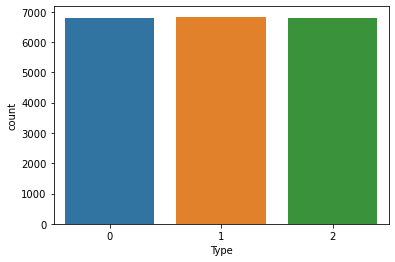

In [2609]:
sns.countplot(x='Type', data=df_all)


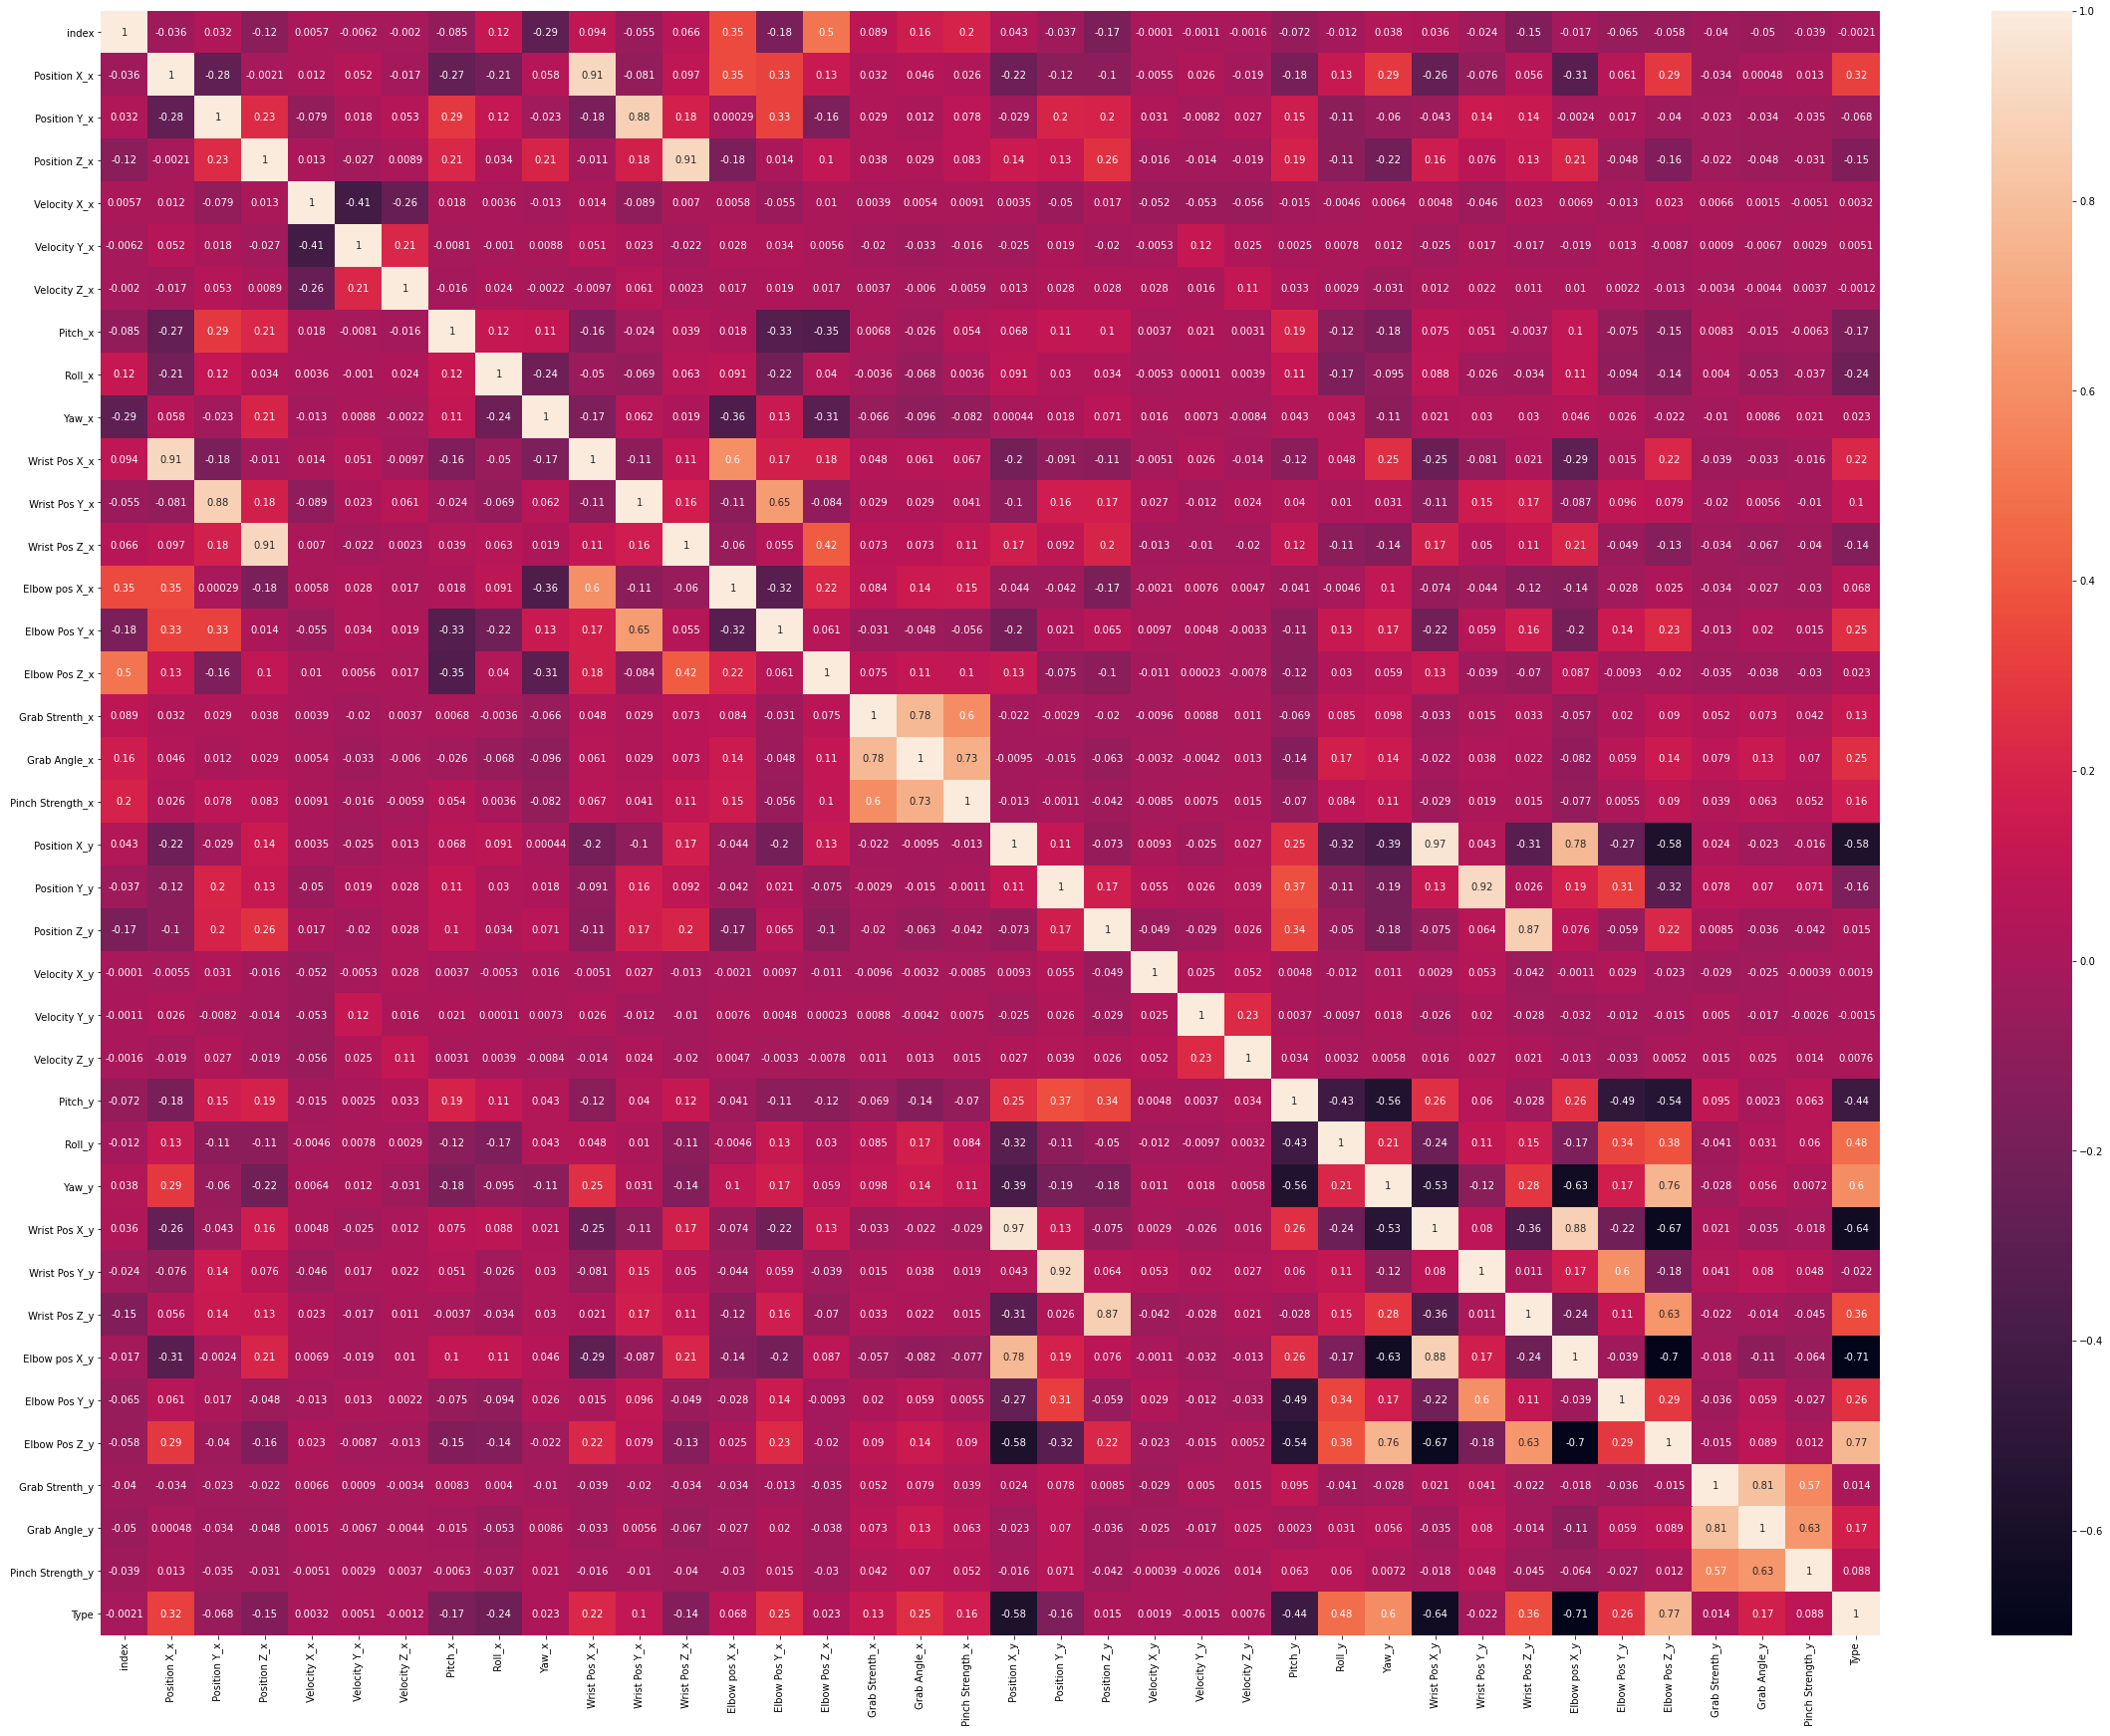

In [2611]:
cormap = df_all.corr()
fig, ax = plt.subplots(figsize=(40,30))
sns.heatmap(cormap, annot = True)

In [2612]:
y = df_all["Type"]
X = df_all.drop(labels = ["Type"], axis = 1)

In [2613]:
X = X.drop(labels = ["index"], axis = 1)

In [2614]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state=42)

In [2615]:
knn = KNeighborsClassifier(5)
knn.fit(X_train, y_train)
knn.score(X_test,  y_test)

0.9317347687790556

In [2617]:
k_range = list(range(1, 101,2))
weight_options = ['uniform', 'distance']
metric_options = ['euclidean','minkowski']
param_grid = dict(n_neighbors=k_range, weights=weight_options,metric = metric_options)

In [2618]:
grid_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=True,n_jobs=-1, verbose=3)
pipe_knn = make_pipeline(StandardScaler(), PCA(n_components=16),grid_knn)
pipe_knn.fit(X_train,y_train)
y_pred=pipe_knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 36.3min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 47.7min finished


Accuracy: 0.9897235135796427


In [2619]:
grid_knn.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [2620]:
xgb1 = XGBClassifier(n_jobs = -1,learning_rate = 0.1, seed = 0,eval_metric='mlogloss',subsample=0.8, n_estimators=150, min_child_weight=10, max_depth=4, gamma=0.5, colsample_bytree=1.0)
xgb1.fit(X_train, y_train)
xgb1.score(X_test,  y_test)

C:\Users\Asaf Yekutiel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9735747492047957

In [2621]:
pipe_xg = make_pipeline(StandardScaler(), PCA(n_components=16),xgb1)
pipe_xg.fit(X_train,y_train)
y_pred=pipe_xg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

C:\Users\Asaf Yekutiel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy: 0.934181551260093


In [2622]:
params_xgb = {
        'learning_rate':[ 0.1, 0.2, 0.3],
        'n_estimators':[100,150,200,250],
        'min_child_weight': [1,3, 5,7, 10],
        'gamma': [0,0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6,0.7, 0.8, 0.9, 1.0],
        'max_depth': [3, 4, 5,8]
        }

In [2623]:
xgb = XGBClassifier(objective='multi:softmax',
                    silent=True, nthread=1)
grid_xgb = RandomizedSearchCV(xgb, param_distributions=params_xgb,scoring='accuracy', return_train_score=True, n_jobs=-1, cv=5,verbose=3, 
                              n_iter=1000 )
pipe_xgb = make_pipeline(StandardScaler(), PCA(n_components=16),grid_xgb)
pipe_xgb.fit(X_train,y_train)
print('Model Accuracy: %.3f' % pipe_xgb.score(X_test, y_test))

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 34.1min
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed: 46.5min
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed: 61.1min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 77.7min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed: 97.1min
[Parallel(n_jobs=-1)]: Done 3848 tasks      | elapsed: 119.0min
[Parallel(n_jobs=-1)]: Done 4584 tasks      | elapsed: 141.5min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed: 154.0min finished
C:\Users\Asaf Yekutiel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use 

[00:25:40] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:25:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.974


In [2624]:
grid_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, silent=True, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [2625]:
rfc = RandomForestClassifier(n_estimators=180,random_state=5, n_jobs=-1)
rfc.fit(X_train, y_train)
rfc.score(X_test,  y_test)

0.9872767310986054

In [2626]:
pipe_tr = make_pipeline(StandardScaler(), PCA(n_components=16),rfc)
pipe_tr.fit(X_train,y_train)
y_pred=pipe_tr.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9586493760704673


In [2627]:
tree_param_grid = [
    
    {
     'n_estimators': [100,150,200,250],
     'max_depth':[None,30,50,100],
     'max_features': ['auto','sqrt','log2'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2,3,5,7],
     'criterion' :['gini', 'entropy']  
        
    }
    
]

In [2628]:
rf = RandomForestClassifier()
gridTree = GridSearchCV(rf,tree_param_grid,scoring='accuracy', return_train_score=True, n_jobs=-1, cv=5, verbose=3)

In [ ]:
pipe = make_pipeline(StandardScaler(), PCA(n_components=16),gridTree)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed: 27.3min


In [ ]:
gridTree.best_estimator_

In [ ]:
rnd_clf = gridTree.best_estimator_
xgb_clf = grid_xgb.best_estimator_ 
adabost = AdaBoostClassifier(n_estimators=150, base_estimator=gridTree.best_estimator_,learning_rate=0.1,) 
knn = KNeighborsClassifier(100)
estimator_list = [
    ('knn',knn),
    ('xgb_tund',xgb_clf),
    ('rf_tund',rnd_clf ),
    ('adabost',adabost)
 
]

# Build stack model
stack_model = StackingClassifier(estimators=estimator_list, final_estimator=LogisticRegression(),cv =5,n_jobs=-1,verbose=3)
pipeline_SM = make_pipeline(StandardScaler(), PCA(n_components=16)
                       ,stack_model)
pipeline_SM.fit(X_train, y_train)
print('Model Accuracy: %.3f' % pipeline_SM.score(X_test, y_test))

### Scale And PCA pipeline

In [ ]:
scaling_pipeline = Pipeline(
    [
        ('std_scaler', StandardScaler()),
        ('pca',PCA(n_components=16, random_state=0,svd_solver='auto')),       
    ]
)
scaled_train = scaling_pipeline.fit_transform(X)
scaled_test = scaling_pipeline.transform(X_testdata)

In [ ]:
pca_data = scaling_pipeline['pca']


plt.plot(np.cumsum(pca_data.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
print(pca_data.n_components_)

In [ ]:
knn_clf = KNeighborsClassifier(100)
knn_clf.fit(scaled_train,y)
knn_clf.score(scaled_test, y_testdata)

In [ ]:
rf = RandomForestClassifier(n_estimators=180,random_state=5, n_jobs=-1, max_depth = 30, criterion= 'entropy',
)
rf .fit(scaled_train,y)
rf .score(scaled_test, y_testdata)

In [ ]:
xgb2 = grid_xgb.best_estimator_
xgb2.fit(scaled_train,y)
xgb2.score(scaled_test, y_testdata)

In [ ]:
stack_model.fit(scaled_train,y)
stack_model.score(scaled_test, y_testdata)